In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("2008.xlsx")

In [3]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2008,17521,234,36,3513
1,2008,18033,165,20,3553
2,2008,17612,7,20,3556
3,2008,17335,94,15,3507
4,2008,17707,254,13,3555
...,...,...,...,...,...
1857,2008,17300,138,31,3531
1858,2008,17693,398,23,3530
1859,2008,17047,343,36,3530
1860,2008,17042,387,23,3527


In [4]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1862, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 0 to 1861
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1862 non-null   int64
 1   Maximum length (m))  1862 non-null   int64
 2   Recession(m),        1862 non-null   int64
 3   Rate/yr(m)           1862 non-null   int64
 4   Snout altitude (m)   1862 non-null   int64
dtypes: int64(5)
memory usage: 72.9 KB


In [6]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [7]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1862


In [8]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [10]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [11]:

df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2008,17521,234,36,3513
1,2008,18033,165,20,3553
2,2008,17612,7,20,3556
3,2008,17335,94,15,3507
4,2008,17707,254,13,3555


In [12]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,-0.0186,-0.0388,-0.0167
"Recession(m),",NaN,-0.0186,1.0000,-0.0031,0.0082
Rate/yr(m),NaN,-0.0388,-0.0031,1.0000,-0.0092
Snout altitude (m),NaN,-0.0167,0.0082,-0.0092,1.0000


In [13]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Snout altitude (m)    -0.0167
Recession(m),         -0.0186
Rate/yr(m)            -0.0388
Year                      NaN
Name: Maximum length (m)), dtype: float64

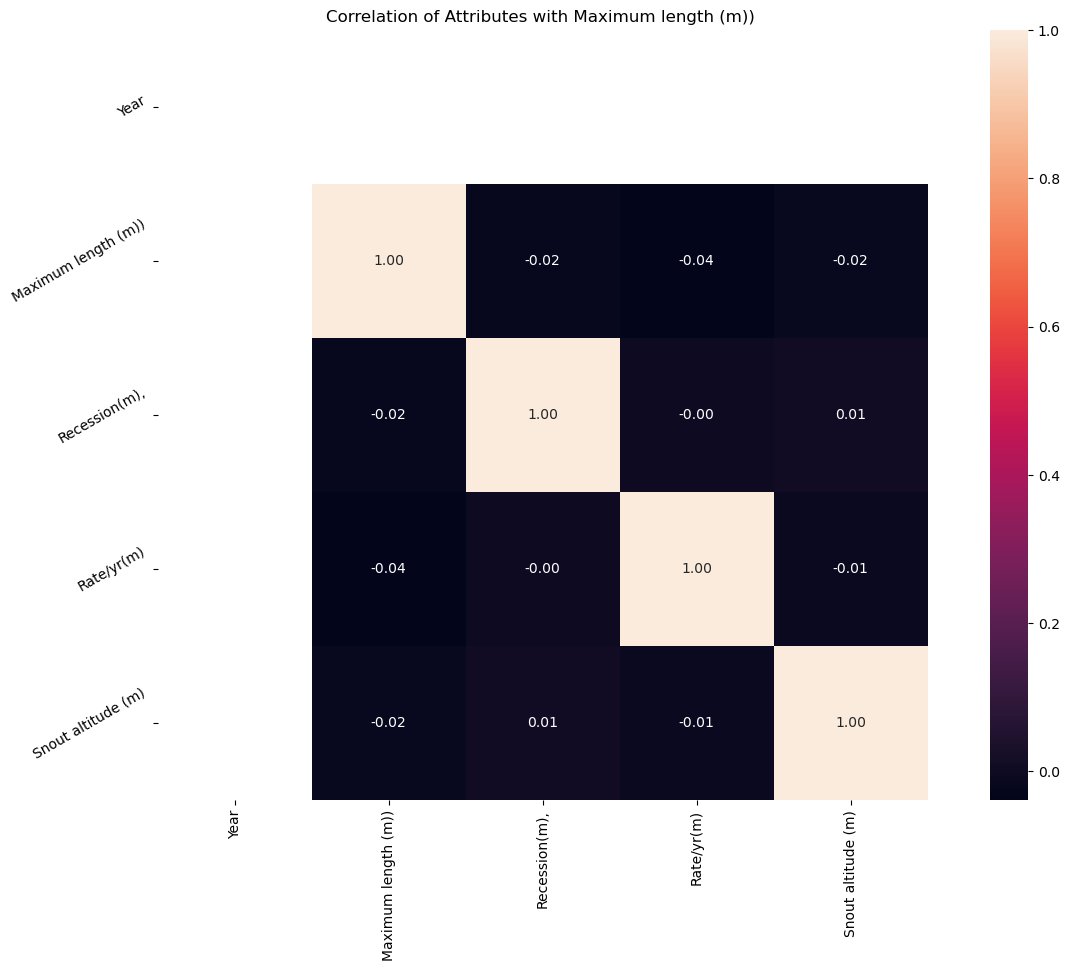

In [14]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [15]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [16]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,862.0000","1,862.0000","1,862.0000","1,862.0000","1,862.0000"
mean,"2,008.0000","17,554.9366",221.5521,27.7084,"3,531.7814"
std,0.0000,300.6396,129.4848,8.6192,20.7637
min,"2,008.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"2,008.0000","17,301.2500",109.2500,20.0000,"3,513.0000"
50%,"2,008.0000","17,546.0000",221.0000,28.0000,"3,531.5000"
75%,"2,008.0000","17,821.7500",333.7500,35.0000,"3,550.0000"
max,"2,008.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

2008   1.0000
Name: Year, dtype: float64

96    0.0054
384   0.0054
439   0.0054
423   0.0048
197   0.0048
       ...  
70    0.0005
181   0.0005
354   0.0005
168   0.0005
320   0.0005
Name: Recession(m),, Length: 436, dtype: float64

20   0.0478
16   0.0408
41   0.0392
34   0.0376
32   0.0371
17   0.0371
40   0.0354
42   0.0354
38   0.0349
35   0.0344
24   0.0344
23   0.0338
30   0.0333
21   0.0333
28   0.0328
26   0.0328
31   0.0322
25   0.0322
37   0.0311
22   0.0311
19   0.0311
29   0.0311
36   0.0306
33   0.0306
13   0.0306
27   0.0306
39   0.0301
18   0.0295
15   0.0285
14   0.0204
Name: Rate/yr(m), dtype: float64

3512   0.0220
3530   0.0193
3511   0.0188
3552   0.0177
3525   0.0177
        ...  
3555   0.0097
3523   0.0091
3516   0.0091
3544   0.0091
3496   0.0011
Name: Snout altitude (m), Length: 72, dtype: float64



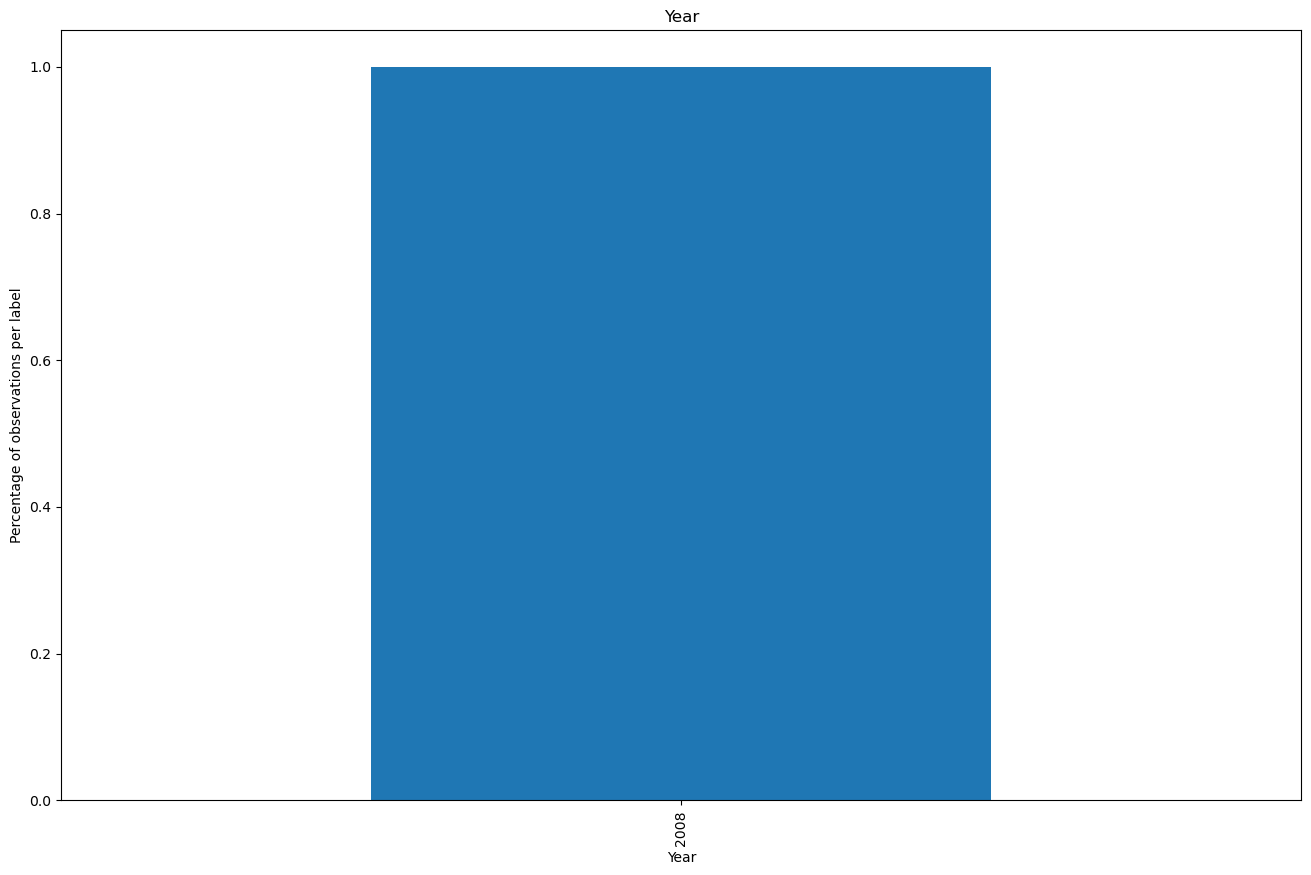

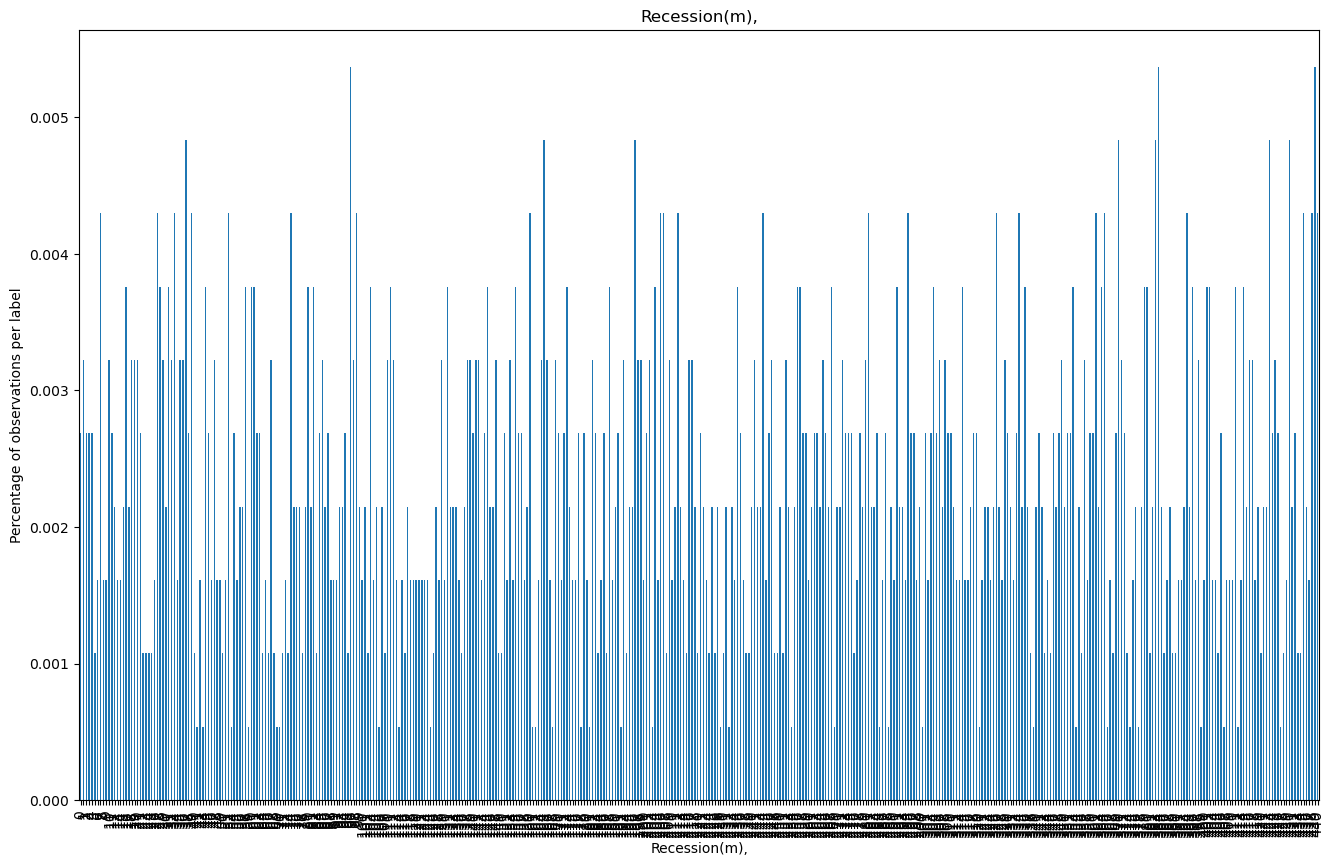

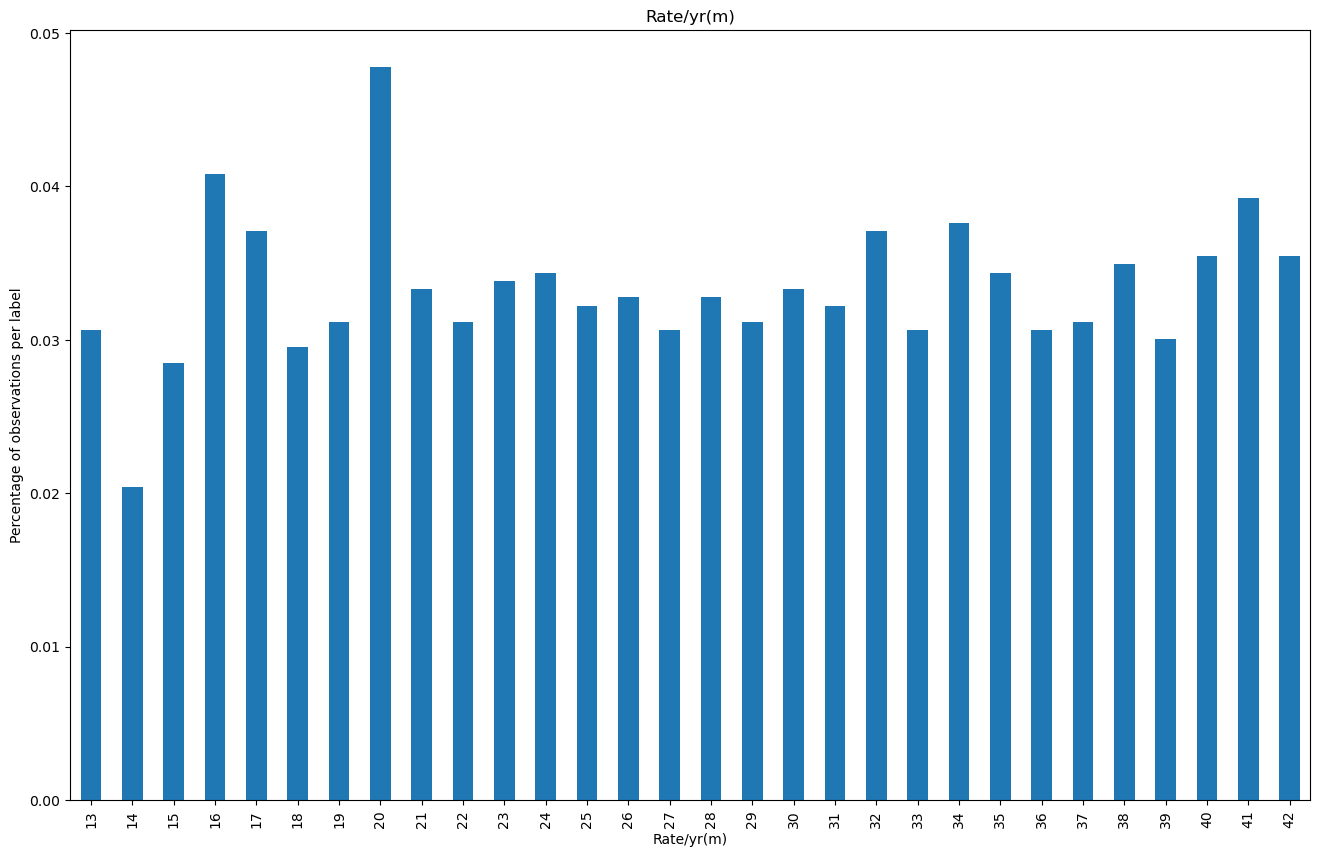

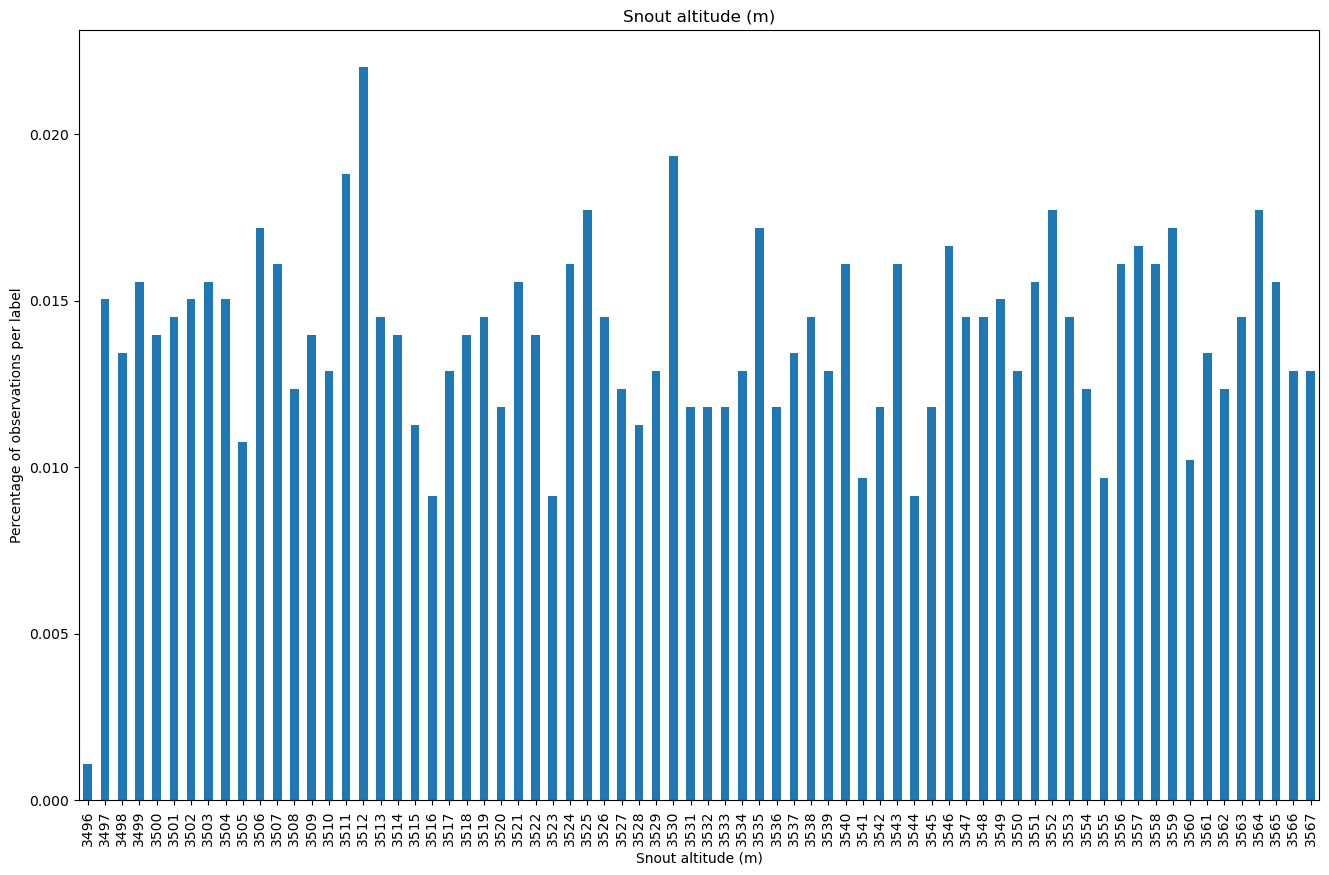

In [18]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()